# Mobile Price Classification

## A.Shivaram
221710312005

Modules involved:
* Loading Data , pre processing our data
* Visualizing our Data , finding correlation among features and target label
* Splitting the data into training samples and testing samples
* Using classification techniques and finding the accuracy of the model
* Analyzing different classification metrics like MSE, RMSE , Precision , Recall , Accuracy etc.
* Concluding the best model.


In [56]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data and pre processing

In [2]:
dtrain = pd.read_csv("dataset\\dataset\\train.csv",sep=",")
dtest = pd.read_csv("dataset\\dataset\\test.csv",sep=",")

In [3]:
dtrain

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [45]:
dtrain.shape

(2000, 21)

In [48]:
dtrain.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
dtrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
dtrain.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

##### Visualizing our Data , finding correlation among features and target label


In [6]:
for i in dtrain.columns:
    print(i,dtrain[i].corr(dtrain['price_range'],method = 'pearson'))

battery_power 0.20072261211373102
blue 0.020572854061418504
clock_speed -0.006605690881732071
dual_sim 0.017444479237224732
fc 0.02199820777690427
four_g 0.0147717114172394
int_memory 0.04443495938898743
m_dep 0.0008530365050864312
mobile_wt -0.030302171314386415
n_cores 0.004399274799457285
pc 0.03359930021353949
px_height 0.1488575550004218
px_width 0.16581750172625515
ram 0.9170457362649905
sc_h 0.022986073167424414
sc_w 0.038711271664484154
talk_time 0.02185887116237479
three_g 0.023611216880045017
touch_screen -0.030411071898218043
wifi 0.018784812012789004
price_range 1.0


here if we can observe ram has the highest correlation value i.e as ram value increases price also increases and -ve correlation between weight of phone and price i.e as weight increases price decreases etc.


lets see one example of highest price range and its columns

In [7]:
dtrain.loc[dtrain["price_range"]==3.0].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3


correlation matrix of our data set


In [8]:
dtrain.corr(method = 'pearson')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


we are using Pearson's correlation factor

Heat map of our data set

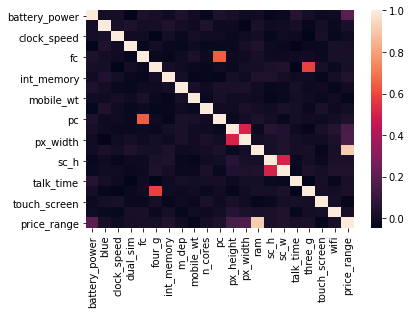

In [49]:
#plot correlation matrix
correlation=dtrain.corr()
sns.heatmap(correlation)
plt.show()


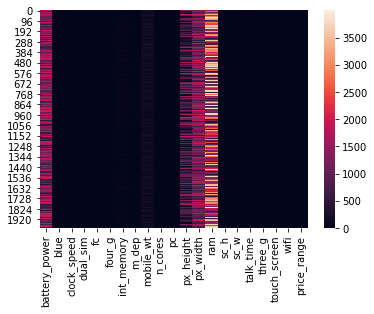

In [9]:
sns.heatmap(dtrain)
plt.show()

Splitting the data into training samples and testing samples

In [10]:
from sklearn.model_selection import train_test_split
x = dtrain.drop(["price_range"],axis=1)
y = dtrain["price_range"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

Using classification techniques and finding the accuracy of the model

# LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import math
clf = LinearRegression()
clf.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
ypred=[]
for i in range(len(y_pred)):
    ypred.append(int(y_pred[i]))
accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt(mse)
print(asc,mse,rmse)

0.5716666666666667 0.42833333333333334 0.6544717972023953


here we just used linear regression to experiment or play , we got very less accuracy ,so we now use actual methods to classify them



# Logistic Regression:

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse =math.sqrt (mse)
print(asc,mse,rmse)
np = clf.predict(dtest.drop(["id"],axis=1))

0.6283333333333333 0.4066666666666667 0.6377042156569663


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision tree classifier using gini impurity (CART):


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

    
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt(mse)
print(asc,mse,rmse)
np1 = clf.predict(dtest.drop(["id"],axis=1))

0.8616666666666667 0.13833333333333334 0.3719318934070233


## Decision tree classifier using entropy

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(xtrain,ytrain)
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)

    
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt(mse)
print(asc,mse,rmse)
np2 = clf.predict(dtest.drop(["id"],axis=1))

0.87 0.13 0.36055512754639896


In [15]:
accuracy_score(np1,np2)

0.954

In [16]:
dtest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Ada boost with SVM as base

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc = SVC(probability=True ,kernel = 'linear')
clf =AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)
clf =clf.fit(xtrain,ytrain)
ypred =clf.predict(xtest)

accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt (mse)
print(asc,mse,rmse)
np3 =clf.predict(dtest.drop(["id"],axis=1))

0.9766666666666667 0.023333333333333334 0.15275252316519466


corresponding confusion matrix :

In [25]:
from sklearn.metrics import classification_report
from sklearn import metrics as ms
from sklearn.metrics import confusion_matrix

In [26]:
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.95      0.98      0.97       149
           2       0.97      0.93      0.95       168
           3       0.96      0.99      0.97       148

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

[[134   1   0   0]
 [  1 146   2   0]
 [  0   6 156   6]
 [  0   0   2 146]]


In [31]:
accuracy_score(np2,np3)

0.848

# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest) 
accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt (mse)
print(asc,mse,rmse)
np =clf.predict(dtest.drop(["id"],axis=1))

0.6983333333333334 0.30666666666666664 0.5537749241945383


# multinomial naive bayes :


In [44]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest) 
accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt (mse)
print(asc,mse,rmse)
np =clf.predict(dtest.drop(["id"],axis=1))

0.6983333333333334 0.30666666666666664 0.5537749241945383


# Concluding the best model.

In [ ]:
Among all the classifiers we choose AdaBoostClassifier as it has highest accuracy compared to other classifiers


In [ ]:
Ada boost with SVM as base

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc = SVC(probability=True ,kernel = 'linear')
clf =AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)
clf =clf.fit(xtrain,ytrain)
ypred =clf.predict(xtest)

accuracy_score(ytest, ypred)
asc = accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = math.sqrt (mse)
print(asc,mse,rmse)
np =clf.predict(dtest.drop(["id"],axis=1))

0.9733333333333334 0.02666666666666667 0.16329931618554522
